In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

# Step 1: Load your dataset
# Example: Assuming your dataset is loaded into a DataFrame df with columns 'text' and 'label'
# Replace this with your actual dataset loading code
df = pd.read_csv('/content/train_complaint..csv')
df.head()

,Complaint #,Description,Label
0,1,Charged for a first-class ticket when I booked...,Billing Issue
1,2,The advertised fare did not match the final pr...,Billing Issue
2,3,Charged extra for a seat selection I didn't ch...,Billing Issue
3,4,"Discount code for seniors, students, or milita...",Billing Issue
4,5,Credit card charged twice for the same train t...,Billing Issue


In [ ]:
df.shape

(504, 3)

In [ ]:
import pandas as pd
import re
import string
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

# Define cleaning functions
def to_lowercase(text):
    return text.lower()

def remove_numbers(text):
    return re.sub(r'\d+', '', text)

def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

def remove_special_characters(text):
    return re.sub(r'[^a-zA-Z0-9\s]', '', text)

def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    tokens = text.split()
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    return ' '.join(filtered_tokens)

# Apply cleaning function to 'text_column'
df['cleaned_text'] = df['Description'].apply(lambda x: remove_stopwords(remove_special_characters(remove_punctuation(remove_numbers(to_lowercase(x))))))

# Display cleaned DataFrame
df.head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Complaint #,Description,Label,cleaned_text
0,1,Charged for a first-class ticket when I booked...,Billing Issue,charged firstclass ticket booked traveled coac...
1,2,The advertised fare did not match the final pr...,Billing Issue,advertised fare match final price paid checkout
2,3,Charged extra for a seat selection I didn't ch...,Billing Issue,charged extra seat selection didnt choose
3,4,"Discount code for seniors, students, or milita...",Billing Issue,discount code seniors students military applie...
4,5,Credit card charged twice for the same train t...,Billing Issue,credit card charged twice train ticket


In [ ]:
!pip3 install googletrans==3.1.0a0

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 2.1 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16353 sha256=ca71fa4c7351bda5888fdca876de6f767c3a2da2daed8885d4d64acf22df2324
  Stored in directory: /root/.cache/pip/wheels/50/5d/3c/8477d0af4ca2b8b1308812c09f1930863caeebc762fe265a95
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:
  

In [ ]:
import googletrans
from googletrans import *
translator = googletrans.Translator()

df['cleaned_text'] = df['cleaned_text'].astype(str) #changing datatype to string
df['hindi_text'] = df['cleaned_text'].apply(translator.translate, src='auto', dest='Hi').apply(getattr, args=('text',))
df['bengali_text'] = df['cleaned_text'].apply(translator.translate, src='auto', dest='bn').apply(getattr, args=('text',))
df['Tamil_text'] = df['cleaned_text'].apply(translator.translate, src='auto', dest='ta').apply(getattr, args=('text',))
df['Telugu_text'] = df['cleaned_text'].apply(translator.translate, src='auto', dest='te').apply(getattr, args=('text',))
df['Gujarati_text'] = df['cleaned_text'].apply(translator.translate, src='auto', dest='gu').apply(getattr, args=('text',))
df['Kannada_text'] = df['cleaned_text'].apply(translator.translate, src='auto', dest='kn').apply(getattr, args=('text',))
df.head()

,Complaint #,Description,Label,cleaned_text,hindi_text,bengali_text,Tamil_text,Telugu_text,Gujarati_text,Kannada_text
0,1,Charged for a first-class ticket when I booked...,Billing Issue,charged firstclass ticket booked traveled coac...,"चार्ज किया गया प्रथम श्रेणी का टिकट, बुक किया ...",চার্জ করা প্রথম শ্রেণীর টিকিট বুক করা ট্রাভেলড...,கட்டணம் வசூலிக்கப்பட்ட முதல் வகுப்பு டிக்கெட் ...,ఛార్జ్ చేసిన ఫస్ట్ క్లాస్ టికెట్ బుక్ చేసిన ట్...,ચાર્જ કરેલ ફર્સ્ટ ક્લાસ ટીકીટ બુક કરેલ ટ્રાવેલ...,ಚಾರ್ಜ್ ಮಾಡಿದ ಪ್ರಥಮ ದರ್ಜೆ ಟಿಕೆಟ್ ಬುಕ್ ಮಾಡಿದ ಪ್ರ...
1,2,The advertised fare did not match the final pr...,Billing Issue,advertised fare match final price paid checkout,विज्ञापित किराया मैच अंतिम कीमत भुगतान चेकआउट,বিজ্ঞাপিত ভাড়া ম্যাচ চূড়ান্ত মূল্য পরিশোধিত ...,விளம்பரப்படுத்தப்பட்ட கட்டணப் போட்டியின் இறுதி...,ప్రచారం ధర మ్యాచ్ చివరి ధర చెల్లించిన చెక్అవుట్,વિજ્ઞાપન ભાડું મેચ અંતિમ કિંમત ચૂકવેલ ચેકઆઉટ,ಜಾಹೀರಾತು ದರ ಪಂದ್ಯದ ಅಂತಿಮ ಬೆಲೆ ಪಾವತಿಸಿದ ಚೆಕ್ಔಟ್
2,3,Charged extra for a seat selection I didn't ch...,Billing Issue,charged extra seat selection didnt choose,"अतिरिक्त सीट का शुल्क लिया गया, चयन नहीं किया गया",চার্জ করা অতিরিক্ত সিট নির্বাচন বাছাই করা হয়নি,கூடுதல் இருக்கை தேர்வு தேர்வு செய்யப்படவில்லை,ఛార్జ్ చేయబడిన అదనపు సీటు ఎంపిక ఎంచుకోలేదు,ચાર્જ વધારાની સીટ પસંદગી પસંદ કરી નથી,ಹೆಚ್ಚುವರಿ ಸೀಟ್ ಆಯ್ಕೆಯನ್ನು ಆಯ್ಕೆ ಮಾಡಿಲ್ಲ
3,4,"Discount code for seniors, students, or milita...",Billing Issue,discount code seniors students military applie...,डिस्काउंट कोड वरिष्ठ छात्र सैन्य अनुप्रयुक्त ब...,ডিসকাউন্ট কোড সিনিয়র ছাত্র সামরিক প্রয়োগ বিলিং,தள்ளுபடி குறியீடு மூத்த மாணவர்கள் இராணுவ பில்ல...,డిస్కౌంట్ కోడ్ సీనియర్ విద్యార్థులు సైనిక దరఖా...,ડિસ્કાઉન્ટ કોડ વરિષ્ઠ વિદ્યાર્થીઓ લશ્કરી લાગુ ...,ರಿಯಾಯಿತಿ ಕೋಡ್ ಹಿರಿಯ ವಿದ್ಯಾರ್ಥಿಗಳು ಮಿಲಿಟರಿ ಅರ್ಜ...
4,5,Credit card charged twice for the same train t...,Billing Issue,credit card charged twice train ticket,क्रेडिट कार्ड से ट्रेन टिकट का दो बार चार्ज लि...,ক্রেডিট কার্ডে দুইবার ট্রেনের টিকিটে চার্জ করা...,கிரெடிட் கார்டு இரண்டு முறை ரயில் டிக்கெட் வசூ...,క్రెడిట్ కార్డ్ రైలు టిక్కెట్‌కి రెండుసార్లు ఛ...,ક્રેડિટ કાર્ડથી બે વાર ટ્રેન ટિકિટ ચાર્જ,ಕ್ರೆಡಿಟ್ ಕಾರ್ಡ್ ಎರಡು ಬಾರಿ ರೈಲು ಟಿಕೆಟ್ ಶುಲ್ಕ ವಿ...


In [ ]:
df.to_csv('multilingual_train_complaint.csv')

In [ ]:
df=pd.read_csv('multilingual_train_complaint.csv',index_col=0)

In [ ]:
df.shape

(504, 10)

In [ ]:
df.head()

,Complaint #,Description,Label,cleaned_text,hindi_text,bengali_text,Tamil_text,Telugu_text,Gujarati_text,Kannada_text
0,1,Charged for a first-class ticket when I booked...,Billing Issue,charged firstclass ticket booked traveled coac...,"चार्ज किया गया प्रथम श्रेणी का टिकट, बुक किया ...",চার্জ করা প্রথম শ্রেণীর টিকিট বুক করা ট্রাভেলড...,கட்டணம் வசூலிக்கப்பட்ட முதல் வகுப்பு டிக்கெட் ...,ఛార్జ్ చేసిన ఫస్ట్ క్లాస్ టికెట్ బుక్ చేసిన ట్...,ચાર્જ કરેલ ફર્સ્ટ ક્લાસ ટીકીટ બુક કરેલ ટ્રાવેલ...,ಚಾರ್ಜ್ ಮಾಡಿದ ಪ್ರಥಮ ದರ್ಜೆ ಟಿಕೆಟ್ ಬುಕ್ ಮಾಡಿದ ಪ್ರ...
1,2,The advertised fare did not match the final pr...,Billing Issue,advertised fare match final price paid checkout,विज्ञापित किराया मैच अंतिम कीमत भुगतान चेकआउट,বিজ্ঞাপিত ভাড়া ম্যাচ চূড়ান্ত মূল্য পরিশোধিত ...,விளம்பரப்படுத்தப்பட்ட கட்டணப் போட்டியின் இறுதி...,ప్రచారం ధర మ్యాచ్ చివరి ధర చెల్లించిన చెక్అవుట్,વિજ્ઞાપન ભાડું મેચ અંતિમ કિંમત ચૂકવેલ ચેકઆઉટ,ಜಾಹೀರಾತು ದರ ಪಂದ್ಯದ ಅಂತಿಮ ಬೆಲೆ ಪಾವತಿಸಿದ ಚೆಕ್ಔಟ್
2,3,Charged extra for a seat selection I didn't ch...,Billing Issue,charged extra seat selection didnt choose,"अतिरिक्त सीट का शुल्क लिया गया, चयन नहीं किया गया",চার্জ করা অতিরিক্ত সিট নির্বাচন বাছাই করা হয়নি,கூடுதல் இருக்கை தேர்வு தேர்வு செய்யப்படவில்லை,ఛార్జ్ చేయబడిన అదనపు సీటు ఎంపిక ఎంచుకోలేదు,ચાર્જ વધારાની સીટ પસંદગી પસંદ કરી નથી,ಹೆಚ್ಚುವರಿ ಸೀಟ್ ಆಯ್ಕೆಯನ್ನು ಆಯ್ಕೆ ಮಾಡಿಲ್ಲ
3,4,"Discount code for seniors, students, or milita...",Billing Issue,discount code seniors students military applie...,डिस्काउंट कोड वरिष्ठ छात्र सैन्य अनुप्रयुक्त ब...,ডিসকাউন্ট কোড সিনিয়র ছাত্র সামরিক প্রয়োগ বিলিং,தள்ளுபடி குறியீடு மூத்த மாணவர்கள் இராணுவ பில்ல...,డిస్కౌంట్ కోడ్ సీనియర్ విద్యార్థులు సైనిక దరఖా...,ડિસ્કાઉન્ટ કોડ વરિષ્ઠ વિદ્યાર્થીઓ લશ્કરી લાગુ ...,ರಿಯಾಯಿತಿ ಕೋಡ್ ಹಿರಿಯ ವಿದ್ಯಾರ್ಥಿಗಳು ಮಿಲಿಟರಿ ಅರ್ಜ...
4,5,Credit card charged twice for the same train t...,Billing Issue,credit card charged twice train ticket,क्रेडिट कार्ड से ट्रेन टिकट का दो बार चार्ज लि...,ক্রেডিট কার্ডে দুইবার ট্রেনের টিকিটে চার্জ করা...,கிரெடிட் கார்டு இரண்டு முறை ரயில் டிக்கெட் வசூ...,క్రెడిట్ కార్డ్ రైలు టిక్కెట్‌కి రెండుసార్లు ఛ...,ક્રેડિટ કાર્ડથી બે વાર ટ્રેન ટિકિટ ચાર્જ,ಕ್ರೆಡಿಟ್ ಕಾರ್ಡ್ ಎರಡು ಬಾರಿ ರೈಲು ಟಿಕೆಟ್ ಶುಲ್ಕ ವಿ...


In [ ]:
label_encoder = LabelEncoder()

# Fit and transform the categorical column
df['label'] = label_encoder.fit_transform(df['Label'])

In [ ]:
df.head()


,Complaint #,Description,Label,cleaned_text,hindi_text,bengali_text,Tamil_text,Telugu_text,Gujarati_text,Kannada_text,label
0,1,Charged for a first-class ticket when I booked...,Billing Issue,charged firstclass ticket booked traveled coac...,"चार्ज किया गया प्रथम श्रेणी का टिकट, बुक किया ...",চার্জ করা প্রথম শ্রেণীর টিকিট বুক করা ট্রাভেলড...,கட்டணம் வசூலிக்கப்பட்ட முதல் வகுப்பு டிக்கெட் ...,ఛార్జ్ చేసిన ఫస్ట్ క్లాస్ టికెట్ బుక్ చేసిన ట్...,ચાર્જ કરેલ ફર્સ્ટ ક્લાસ ટીકીટ બુક કરેલ ટ્રાવેલ...,ಚಾರ್ಜ್ ಮಾಡಿದ ಪ್ರಥಮ ದರ್ಜೆ ಟಿಕೆಟ್ ಬುಕ್ ಮಾಡಿದ ಪ್ರ...,1
1,2,The advertised fare did not match the final pr...,Billing Issue,advertised fare match final price paid checkout,विज्ञापित किराया मैच अंतिम कीमत भुगतान चेकआउट,বিজ্ঞাপিত ভাড়া ম্যাচ চূড়ান্ত মূল্য পরিশোধিত ...,விளம்பரப்படுத்தப்பட்ட கட்டணப் போட்டியின் இறுதி...,ప్రచారం ధర మ్యాచ్ చివరి ధర చెల్లించిన చెక్అవుట్,વિજ્ઞાપન ભાડું મેચ અંતિમ કિંમત ચૂકવેલ ચેકઆઉટ,ಜಾಹೀರಾತು ದರ ಪಂದ್ಯದ ಅಂತಿಮ ಬೆಲೆ ಪಾವತಿಸಿದ ಚೆಕ್ಔಟ್,1
2,3,Charged extra for a seat selection I didn't ch...,Billing Issue,charged extra seat selection didnt choose,"अतिरिक्त सीट का शुल्क लिया गया, चयन नहीं किया गया",চার্জ করা অতিরিক্ত সিট নির্বাচন বাছাই করা হয়নি,கூடுதல் இருக்கை தேர்வு தேர்வு செய்யப்படவில்லை,ఛార్జ్ చేయబడిన అదనపు సీటు ఎంపిక ఎంచుకోలేదు,ચાર્જ વધારાની સીટ પસંદગી પસંદ કરી નથી,ಹೆಚ್ಚುವರಿ ಸೀಟ್ ಆಯ್ಕೆಯನ್ನು ಆಯ್ಕೆ ಮಾಡಿಲ್ಲ,1
3,4,"Discount code for seniors, students, or milita...",Billing Issue,discount code seniors students military applie...,डिस्काउंट कोड वरिष्ठ छात्र सैन्य अनुप्रयुक्त ब...,ডিসকাউন্ট কোড সিনিয়র ছাত্র সামরিক প্রয়োগ বিলিং,தள்ளுபடி குறியீடு மூத்த மாணவர்கள் இராணுவ பில்ல...,డిస్కౌంట్ కోడ్ సీనియర్ విద్యార్థులు సైనిక దరఖా...,ડિસ્કાઉન્ટ કોડ વરિષ્ઠ વિદ્યાર્થીઓ લશ્કરી લાગુ ...,ರಿಯಾಯಿತಿ ಕೋಡ್ ಹಿರಿಯ ವಿದ್ಯಾರ್ಥಿಗಳು ಮಿಲಿಟರಿ ಅರ್ಜ...,1
4,5,Credit card charged twice for the same train t...,Billing Issue,credit card charged twice train ticket,क्रेडिट कार्ड से ट्रेन टिकट का दो बार चार्ज लि...,ক্রেডিট কার্ডে দুইবার ট্রেনের টিকিটে চার্জ করা...,கிரெடிட் கார்டு இரண்டு முறை ரயில் டிக்கெட் வசூ...,క్రెడిట్ కార్డ్ రైలు టిక్కెట్‌కి రెండుసార్లు ఛ...,ક્રેડિટ કાર્ડથી બે વાર ટ્રેન ટિકિટ ચાર્જ,ಕ್ರೆಡಿಟ್ ಕಾರ್ಡ್ ಎರಡು ಬಾರಿ ರೈಲು ಟಿಕೆಟ್ ಶುಲ್ಕ ವಿ...,1


In [ ]:
df.columns

Index(['Complaint #', 'Description', 'Label', 'cleaned_text', 'hindi_text',
       'bengali_text', 'Tamil_text', 'Telugu_text', 'Gujarati_text',
       'Kannada_text', 'label'],
      dtype='object')

In [ ]:
print("Label Encoder Mapping:")
for label, encoded_value in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{label} -> {encoded_value}")

Label Encoder Mapping:
Amenities Issues -> 0
Billing Issue -> 1
Booking Issues -> 2
Defective Products -> 3
Lost items -> 4
Payment issues -> 5
Safety Issues -> 6
Service Complaints -> 7
Train Delays -> 8
website and app issues -> 9


In [ ]:
df=pd.read_csv('/content/multilingual_train_complaint.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,Complaint #,Description,Label,cleaned_text,hindi_text,bengali_text,Tamil_text,Telugu_text,Gujarati_text,Kannada_text
0,0,0,1,Charged for a first-class ticket when I booked...,Billing Issue,charged firstclass ticket booked traveled coac...,"चार्ज किया गया प्रथम श्रेणी का टिकट, बुक किया ...",চার্জ করা প্রথম শ্রেণীর টিকিট বুক করা ট্রাভেলড...,கட்டணம் வசூலிக்கப்பட்ட முதல் வகுப்பு டிக்கெட் ...,ఛార్జ్ చేసిన ఫస్ట్ క్లాస్ టికెట్ బుక్ చేసిన ట్...,ચાર્જ કરેલ ફર્સ્ટ ક્લાસ ટીકીટ બુક કરેલ ટ્રાવેલ...,ಚಾರ್ಜ್ ಮಾಡಿದ ಪ್ರಥಮ ದರ್ಜೆ ಟಿಕೆಟ್ ಬುಕ್ ಮಾಡಿದ ಪ್ರ...
1,1,1,2,The advertised fare did not match the final pr...,Billing Issue,advertised fare match final price paid checkout,विज्ञापित किराया मैच अंतिम कीमत भुगतान चेकआउट,বিজ্ঞাপিত ভাড়া ম্যাচ চূড়ান্ত মূল্য পরিশোধিত ...,விளம்பரப்படுத்தப்பட்ட கட்டணப் போட்டியின் இறுதி...,ప్రచారం ధర మ్యాచ్ చివరి ధర చెల్లించిన చెక్అవుట్,વિજ્ઞાપન ભાડું મેચ અંતિમ કિંમત ચૂકવેલ ચેકઆઉટ,ಜಾಹೀರಾತು ದರ ಪಂದ್ಯದ ಅಂತಿಮ ಬೆಲೆ ಪಾವತಿಸಿದ ಚೆಕ್ಔಟ್
2,2,2,3,Charged extra for a seat selection I didn't ch...,Billing Issue,charged extra seat selection didnt choose,"अतिरिक्त सीट का शुल्क लिया गया, चयन नहीं किया गया",চার্জ করা অতিরিক্ত সিট নির্বাচন বাছাই করা হয়নি,கூடுதல் இருக்கை தேர்வு தேர்வு செய்யப்படவில்லை,ఛార్జ్ చేయబడిన అదనపు సీటు ఎంపిక ఎంచుకోలేదు,ચાર્જ વધારાની સીટ પસંદગી પસંદ કરી નથી,ಹೆಚ್ಚುವರಿ ಸೀಟ್ ಆಯ್ಕೆಯನ್ನು ಆಯ್ಕೆ ಮಾಡಿಲ್ಲ
3,3,3,4,"Discount code for seniors, students, or milita...",Billing Issue,discount code seniors students military applie...,डिस्काउंट कोड वरिष्ठ छात्र सैन्य अनुप्रयुक्त ब...,ডিসকাউন্ট কোড সিনিয়র ছাত্র সামরিক প্রয়োগ বিলিং,தள்ளுபடி குறியீடு மூத்த மாணவர்கள் இராணுவ பில்ல...,డిస్కౌంట్ కోడ్ సీనియర్ విద్యార్థులు సైనిక దరఖా...,ડિસ્કાઉન્ટ કોડ વરિષ્ઠ વિદ્યાર્થીઓ લશ્કરી લાગુ ...,ರಿಯಾಯಿತಿ ಕೋಡ್ ಹಿರಿಯ ವಿದ್ಯಾರ್ಥಿಗಳು ಮಿಲಿಟರಿ ಅರ್ಜ...
4,4,4,5,Credit card charged twice for the same train t...,Billing Issue,credit card charged twice train ticket,क्रेडिट कार्ड से ट्रेन टिकट का दो बार चार्ज लि...,ক্রেডিট কার্ডে দুইবার ট্রেনের টিকিটে চার্জ করা...,கிரெடிட் கார்டு இரண்டு முறை ரயில் டிக்கெட் வசூ...,క్రెడిట్ కార్డ్ రైలు టిక్కెట్‌కి రెండుసార్లు ఛ...,ક્રેડિટ કાર્ડથી બે વાર ટ્રેન ટિકિટ ચાર્જ,ಕ್ರೆಡಿಟ್ ಕಾರ್ಡ್ ಎರಡು ಬಾರಿ ರೈಲು ಟಿಕೆಟ್ ಶುಲ್ಕ ವಿ...


In [ ]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Complaint #,Description,Label,cleaned_text,hindi_text,bengali_text,Tamil_text,Telugu_text,Gujarati_text,Kannada_text
0,0,0,1,Charged for a first-class ticket when I booked...,Billing Issue,charged firstclass ticket booked traveled coac...,"चार्ज किया गया प्रथम श्रेणी का टिकट, बुक किया ...",চার্জ করা প্রথম শ্রেণীর টিকিট বুক করা ট্রাভেলড...,கட்டணம் வசூலிக்கப்பட்ட முதல் வகுப்பு டிக்கெட் ...,ఛార్జ్ చేసిన ఫస్ట్ క్లాస్ టికెట్ బుక్ చేసిన ట్...,ચાર્જ કરેલ ફર્સ્ટ ક્લાસ ટીકીટ બુક કરેલ ટ્રાવેલ...,ಚಾರ್ಜ್ ಮಾಡಿದ ಪ್ರಥಮ ದರ್ಜೆ ಟಿಕೆಟ್ ಬುಕ್ ಮಾಡಿದ ಪ್ರ...
1,1,1,2,The advertised fare did not match the final pr...,Billing Issue,advertised fare match final price paid checkout,विज्ञापित किराया मैच अंतिम कीमत भुगतान चेकआउट,বিজ্ঞাপিত ভাড়া ম্যাচ চূড়ান্ত মূল্য পরিশোধিত ...,விளம்பரப்படுத்தப்பட்ட கட்டணப் போட்டியின் இறுதி...,ప్రచారం ధర మ్యాచ్ చివరి ధర చెల్లించిన చెక్అవుట్,વિજ્ઞાપન ભાડું મેચ અંતિમ કિંમત ચૂકવેલ ચેકઆઉટ,ಜಾಹೀರಾತು ದರ ಪಂದ್ಯದ ಅಂತಿಮ ಬೆಲೆ ಪಾವತಿಸಿದ ಚೆಕ್ಔಟ್
2,2,2,3,Charged extra for a seat selection I didn't ch...,Billing Issue,charged extra seat selection didnt choose,"अतिरिक्त सीट का शुल्क लिया गया, चयन नहीं किया गया",চার্জ করা অতিরিক্ত সিট নির্বাচন বাছাই করা হয়নি,கூடுதல் இருக்கை தேர்வு தேர்வு செய்யப்படவில்லை,ఛార్జ్ చేయబడిన అదనపు సీటు ఎంపిక ఎంచుకోలేదు,ચાર્જ વધારાની સીટ પસંદગી પસંદ કરી નથી,ಹೆಚ್ಚುವರಿ ಸೀಟ್ ಆಯ್ಕೆಯನ್ನು ಆಯ್ಕೆ ಮಾಡಿಲ್ಲ
3,3,3,4,"Discount code for seniors, students, or milita...",Billing Issue,discount code seniors students military applie...,डिस्काउंट कोड वरिष्ठ छात्र सैन्य अनुप्रयुक्त ब...,ডিসকাউন্ট কোড সিনিয়র ছাত্র সামরিক প্রয়োগ বিলিং,தள்ளுபடி குறியீடு மூத்த மாணவர்கள் இராணுவ பில்ல...,డిస్కౌంట్ కోడ్ సీనియర్ విద్యార్థులు సైనిక దరఖా...,ડિસ્કાઉન્ટ કોડ વરિષ્ઠ વિદ્યાર્થીઓ લશ્કરી લાગુ ...,ರಿಯಾಯಿತಿ ಕೋಡ್ ಹಿರಿಯ ವಿದ್ಯಾರ್ಥಿಗಳು ಮಿಲಿಟರಿ ಅರ್ಜ...
4,4,4,5,Credit card charged twice for the same train t...,Billing Issue,credit card charged twice train ticket,क्रेडिट कार्ड से ट्रेन टिकट का दो बार चार्ज लि...,ক্রেডিট কার্ডে দুইবার ট্রেনের টিকিটে চার্জ করা...,கிரெடிட் கார்டு இரண்டு முறை ரயில் டிக்கெட் வசூ...,క్రెడిట్ కార్డ్ రైలు టిక్కెట్‌కి రెండుసార్లు ఛ...,ક્રેડિટ કાર્ડથી બે વાર ટ્રેન ટિકિટ ચાર્જ,ಕ್ರೆಡಿಟ್ ಕಾರ್ಡ್ ಎರಡು ಬಾರಿ ರೈಲು ಟಿಕೆಟ್ ಶುಲ್ಕ ವಿ...


In [ ]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Complaint #', 'Description', 'Label',
       'cleaned_text', 'hindi_text', 'bengali_text', 'Tamil_text',
       'Telugu_text', 'Gujarati_text', 'Kannada_text'],
      dtype='object')

In [ ]:
text_columns = ['cleaned_text', 'hindi_text', 'bengali_text', 'Tamil_text', 'Telugu_text', 'Gujarati_text', 'Kannada_text']

# Create the 'multilingual' column by randomly selecting from the specified columns
df['multilingual'] = df.apply(lambda row: np.random.choice([row[col] for col in text_columns if pd.notnull(row[col])]), axis=1)

# Display the 'Label', 'label', and 'multilingual' columns
result_df = df[['Label', 'label', 'multilingual']]
print(result_df.head())

           Label  label                                       multilingual
0  Billing Issue      1  चार्ज किया गया प्रथम श्रेणी का टिकट, बुक किया ...
1  Billing Issue      1      विज्ञापित किराया मैच अंतिम कीमत भुगतान चेकआउट
2  Billing Issue      1         ఛార్జ్ చేయబడిన అదనపు సీటు ఎంపిక ఎంచుకోలేదు
3  Billing Issue      1  discount code seniors students military applie...
4  Billing Issue      1  கிரெடிட் கார்டு இரண்டு முறை ரயில் டிக்கெட் வசூ...


In [ ]:
result_df.head()

,Label,label,multilingual
0,Billing Issue,1,"चार्ज किया गया प्रथम श्रेणी का टिकट, बुक किया ..."
1,Billing Issue,1,विज्ञापित किराया मैच अंतिम कीमत भुगतान चेकआउट
2,Billing Issue,1,ఛార్జ్ చేయబడిన అదనపు సీటు ఎంపిక ఎంచుకోలేదు
3,Billing Issue,1,discount code seniors students military applie...
4,Billing Issue,1,கிரெடிட் கார்டு இரண்டு முறை ரயில் டிக்கெட் வசூ...


In [ ]:
result_df.shape

(504, 3)

In [ ]:
result_df.to_csv('result_train_multilingual.csv')

In [ ]:
df=result_df.copy()

In [ ]:
import pandas as pd

# Load your dataset
df = pd.read_csv('/content/multilingual_train_complaint.csv')

# Define the label encoder mapping
label_map = {
    'Amenities Issues': 0,
    'Billing Issue': 1,
    'Booking Issues': 2,
    'Defective Products': 3,
    'Lost items': 4,
    'Payment issues': 5,
    'Safety Issues': 6,
    'Service Complaints': 7,
    'Train Delays': 8,
    'website and app issues': 9
}

# Map the labels in the 'Label' column to their corresponding numerical values
df['label'] = df['Label'].map(label_map)

# Check the first few rows to confirm the mapping
df.head()

,Unnamed: 0.1,Unnamed: 0,Complaint #,Description,Label,cleaned_text,hindi_text,bengali_text,Tamil_text,Telugu_text,Gujarati_text,Kannada_text,label
0,0,0,1,Charged for a first-class ticket when I booked...,Billing Issue,charged firstclass ticket booked traveled coac...,"चार्ज किया गया प्रथम श्रेणी का टिकट, बुक किया ...",চার্জ করা প্রথম শ্রেণীর টিকিট বুক করা ট্রাভেলড...,கட்டணம் வசூலிக்கப்பட்ட முதல் வகுப்பு டிக்கெட் ...,ఛార్జ్ చేసిన ఫస్ట్ క్లాస్ టికెట్ బుక్ చేసిన ట్...,ચાર્જ કરેલ ફર્સ્ટ ક્લાસ ટીકીટ બુક કરેલ ટ્રાવેલ...,ಚಾರ್ಜ್ ಮಾಡಿದ ಪ್ರಥಮ ದರ್ಜೆ ಟಿಕೆಟ್ ಬುಕ್ ಮಾಡಿದ ಪ್ರ...,1
1,1,1,2,The advertised fare did not match the final pr...,Billing Issue,advertised fare match final price paid checkout,विज्ञापित किराया मैच अंतिम कीमत भुगतान चेकआउट,বিজ্ঞাপিত ভাড়া ম্যাচ চূড়ান্ত মূল্য পরিশোধিত ...,விளம்பரப்படுத்தப்பட்ட கட்டணப் போட்டியின் இறுதி...,ప్రచారం ధర మ్యాచ్ చివరి ధర చెల్లించిన చెక్అవుట్,વિજ્ઞાપન ભાડું મેચ અંતિમ કિંમત ચૂકવેલ ચેકઆઉટ,ಜಾಹೀರಾತು ದರ ಪಂದ್ಯದ ಅಂತಿಮ ಬೆಲೆ ಪಾವತಿಸಿದ ಚೆಕ್ಔಟ್,1
2,2,2,3,Charged extra for a seat selection I didn't ch...,Billing Issue,charged extra seat selection didnt choose,"अतिरिक्त सीट का शुल्क लिया गया, चयन नहीं किया गया",চার্জ করা অতিরিক্ত সিট নির্বাচন বাছাই করা হয়নি,கூடுதல் இருக்கை தேர்வு தேர்வு செய்யப்படவில்லை,ఛార్జ్ చేయబడిన అదనపు సీటు ఎంపిక ఎంచుకోలేదు,ચાર્જ વધારાની સીટ પસંદગી પસંદ કરી નથી,ಹೆಚ್ಚುವರಿ ಸೀಟ್ ಆಯ್ಕೆಯನ್ನು ಆಯ್ಕೆ ಮಾಡಿಲ್ಲ,1
3,3,3,4,"Discount code for seniors, students, or milita...",Billing Issue,discount code seniors students military applie...,डिस्काउंट कोड वरिष्ठ छात्र सैन्य अनुप्रयुक्त ब...,ডিসকাউন্ট কোড সিনিয়র ছাত্র সামরিক প্রয়োগ বিলিং,தள்ளுபடி குறியீடு மூத்த மாணவர்கள் இராணுவ பில்ல...,డిస్కౌంట్ కోడ్ సీనియర్ విద్యార్థులు సైనిక దరఖా...,ડિસ્કાઉન્ટ કોડ વરિષ્ઠ વિદ્યાર્થીઓ લશ્કરી લાગુ ...,ರಿಯಾಯಿತಿ ಕೋಡ್ ಹಿರಿಯ ವಿದ್ಯಾರ್ಥಿಗಳು ಮಿಲಿಟರಿ ಅರ್ಜ...,1
4,4,4,5,Credit card charged twice for the same train t...,Billing Issue,credit card charged twice train ticket,क्रेडिट कार्ड से ट्रेन टिकट का दो बार चार्ज लि...,ক্রেডিট কার্ডে দুইবার ট্রেনের টিকিটে চার্জ করা...,கிரெடிட் கார்டு இரண்டு முறை ரயில் டிக்கெட் வசூ...,క్రెడిట్ కార్డ్ రైలు టిక్కెట్‌కి రెండుసార్లు ఛ...,ક્રેડિટ કાર્ડથી બે વાર ટ્રેન ટિકિટ ચાર્જ,ಕ್ರೆಡಿಟ್ ಕಾರ್ಡ್ ಎರಡು ಬಾರಿ ರೈಲು ಟಿಕೆಟ್ ಶುಲ್ಕ ವಿ...,1


In [ ]:
df.shape

(504, 13)

In [ ]:
df.to_csv('multilingual_test.csv')

In [ ]:
df.head()

,Label,label,multilingual
0,Billing Issue,1,"चार्ज किया गया प्रथम श्रेणी का टिकट, बुक किया ..."
1,Billing Issue,1,विज्ञापित किराया मैच अंतिम कीमत भुगतान चेकआउट
2,Billing Issue,1,ఛార్జ్ చేయబడిన అదనపు సీటు ఎంపిక ఎంచుకోలేదు
3,Billing Issue,1,discount code seniors students military applie...
4,Billing Issue,1,கிரெடிட் கார்டு இரண்டு முறை ரயில் டிக்கெட் வசூ...


In [ ]:
df.shape

(504, 13)

In [ ]:
df.to_csv('/content/multilingual_train_complaint.csv')

# English

# Random Forest

In [ ]:
X_train.shape

(352,)

In [ ]:
X_test.shape

(152,)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

# Mapping of class labels to names
label_map = {
    0: 'Amenities Issues',
    1: 'Billing Issue',
    2: 'Booking Issues',
    3: 'Defective Products',
    4: 'Lost items',
    5: 'Payment issues',
    6: 'Safety Issues',
    7: 'Service Complaints',
    8: 'Train Delays',
    9: 'Website and App Issues'
}

# Step 1: Split data into train and test sets (80:20 split)
X_train, X_test, y_train, y_test = train_test_split(df['Telugu_text'], df['label'], test_size=0.3, random_state=42)

# Step 2: Text Vectorization using TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

# Step 3: Train the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_vect, y_train)

# Step 4: Predictions
y_pred = rf_classifier.predict(X_test_vect)

# Step 5: Print Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Step 6: Print Confusion Matrix with Label Names
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
labels = [label_map[i] for i in sorted(label_map.keys())]  # Get labels in correct order

# Create a labeled DataFrame for the confusion matrix
cm_df = pd.DataFrame(cm, index=labels, columns=labels)
print(cm_df)


Classification Report:
              precision    recall  f1-score   support

           0       0.28      0.41      0.33        17
           1       0.29      0.28      0.29        18
           2       0.12      0.17      0.14         6
           3       0.50      0.15      0.23        20
           4       0.73      0.42      0.53        19
           5       0.25      0.11      0.15         9
           6       0.68      0.85      0.76        20
           7       0.50      0.35      0.41        20
           8       0.64      0.58      0.61        12
           9       0.19      0.55      0.29        11

    accuracy                           0.41       152
   macro avg       0.42      0.39      0.37       152
weighted avg       0.46      0.41      0.41       152


Confusion Matrix:
                        Amenities Issues  Billing Issue  Booking Issues  \
Amenities Issues                       7              0               0   
Billing Issue                          4         

Classification Report:
                        precision    recall  f1-score   support

      Amenities Issues       0.55      0.71      0.62        17
         Billing Issue       0.83      0.83      0.83        18
        Booking Issues       0.50      0.33      0.40         6
    Defective Products       0.50      0.30      0.37        20
            Lost items       1.00      0.84      0.91        19
        Payment issues       0.78      0.78      0.78         9
         Safety Issues       0.90      0.95      0.93        20
    Service Complaints       0.68      0.65      0.67        20
          Train Delays       0.80      0.67      0.73        12
Website and App Issues       0.48      0.91      0.62        11

              accuracy                           0.71       152
             macro avg       0.70      0.70      0.69       152
          weighted avg       0.72      0.71      0.71       152



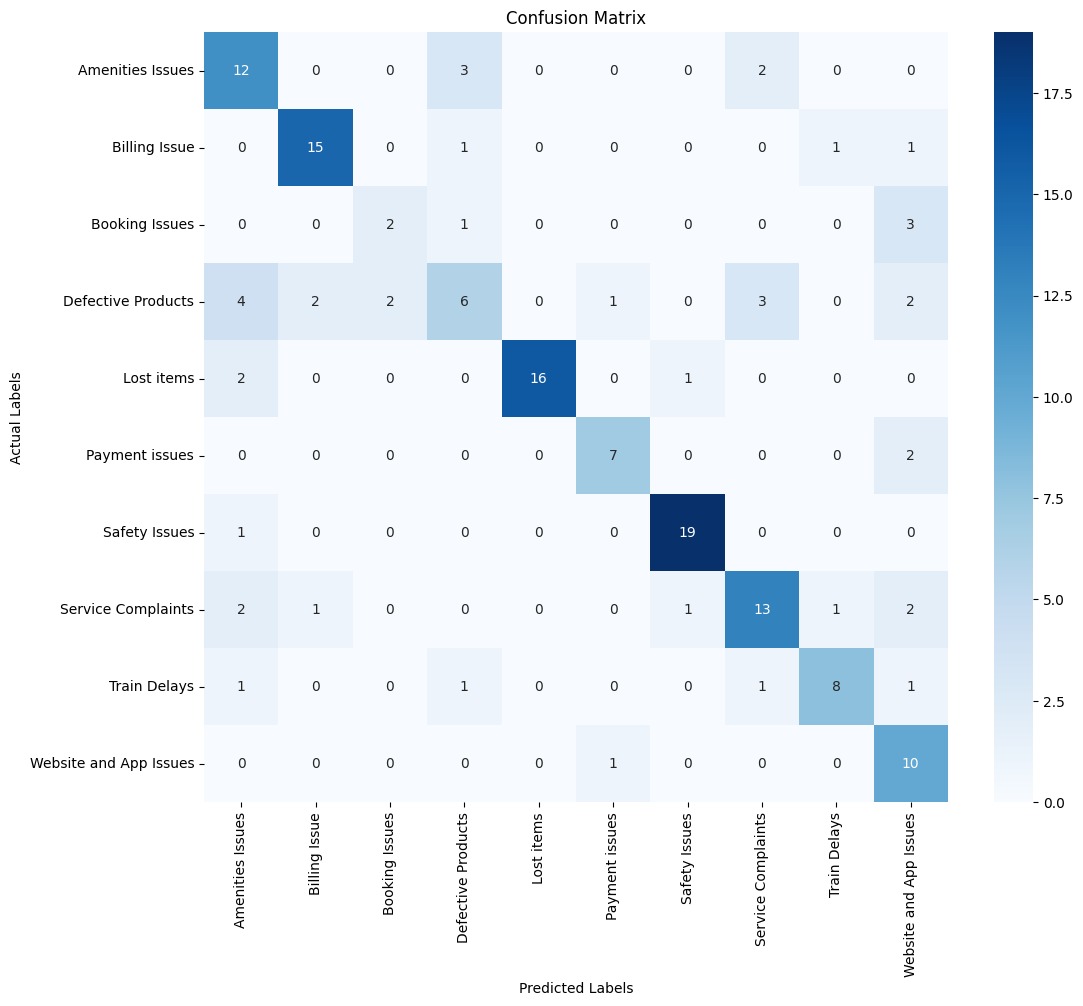

AttributeError: 'numpy.ndarray' object has no attribute 'map'

In [ ]:
# Step 5: Print Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_map.values()))

# Step 6: Confusion Matrix Visualization
import matplotlib.pyplot as  plt
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=label_map.values(), yticklabels=label_map.values(), cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()

# Step 7: Identify and Print Misclassified Samples
misclassified_indices = y_test != y_pred
misclassified_samples = pd.DataFrame({
    'Text': X_test[misclassified_indices],
    'Actual Label': y_test[misclassified_indices].map(label_map),
    'Predicted Label': y_pred[misclassified_indices].map(label_map)
})

print("\nMisclassified Samples:")
print(misclassified_samples.reset_index(drop=True))

# Optionally, save misclassified samples to CSV
misclassified_samples.to_csv('misclassified_samples.csv', index=False)


In [ ]:
# Step 7: Identify and Print Misclassified Samples
misclassified_indices = y_test != y_pred

# Convert y_test and y_pred to pandas Series for mapping
y_test_series = pd.Series(y_test, index=X_test.index)
y_pred_series = pd.Series(y_pred, index=X_test.index)

# Create a DataFrame of misclassified samples
misclassified_samples = pd.DataFrame({
    'Text': X_test[misclassified_indices],
    'Actual Label': y_test_series[misclassified_indices].map(label_map),
    'Predicted Label': y_pred_series[misclassified_indices].map(label_map)
})

print("\nMisclassified Samples:")
print(misclassified_samples.reset_index(drop=True))


Misclassified Samples:
                                                 Text            Actual Label  \
0   inflexible ticketing policies caused difficult...      Service Complaints   
1   displayed platform number train kept changing ...      Defective Products   
2   system wouldnt allow choosing specific seats e...      Defective Products   
3   website crashed checkout unsure ticket purchas...          Booking Issues   
4   uncomfortable unclean conditions train eg exce...      Service Complaints   
5   staff member blamed passengers train delay cau...      Service Complaints   
6   unable pay ticket due system error still recei...           Billing Issue   
7   chosen dietary preferences meal service werent...      Defective Products   
8   unclear poorly communicated instructions train...      Service Complaints   
9   website redirected users nonfunctional booking...          Booking Issues   
10  train cancellation resulted missing crucial bu...            Train Delays   
11  

In [ ]:
misclassified_samples.to_csv("missclassified.csv")

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd


# Mapping of class labels to names
label_map = {
    0: 'Amenities Issues',
    1: 'Billing Issue',
    2: 'Booking Issues',
    3: 'Defective Products',
    4: 'Lost items',
    5: 'Payment issues',
    6: 'Safety Issues',
    7: 'Service Complaints',
    8: 'Train Delays',
    9: 'Website and App Issues'
}

# Step 1: Split data into train and test sets (70:30 split)
X_train, X_test, y_train, y_test = train_test_split(df['multilingual'], df['label'], test_size=0.3, random_state=42)

# Step 2: Text Vectorization using TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

# Step 3: Train the XGBoost Classifier
xgb_classifier = XGBClassifier(random_state=42)
xgb_classifier.fit(X_train_vect, y_train)

# Step 4: Predictions
y_pred = xgb_classifier.predict(X_test_vect)

# Step 5: Print Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Step 6: Print Confusion Matrix with Label Names
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
labels = [label_map[i] for i in sorted(label_map.keys())]  # Get labels in correct order

# Create a labeled DataFrame for the confusion matrix
cm_df = pd.DataFrame(cm, index=labels, columns=labels)
print(cm_df)


Classification Report:
              precision    recall  f1-score   support

           0       0.14      0.12      0.13        17
           1       0.14      0.22      0.17        18
           2       0.29      0.33      0.31         6
           3       0.00      0.00      0.00        20
           4       0.17      0.21      0.19        19
           5       0.25      0.33      0.29         9
           6       0.33      0.40      0.36        20
           7       0.33      0.30      0.32        20
           8       0.22      0.17      0.19        12
           9       0.17      0.18      0.17        11

    accuracy                           0.22       152
   macro avg       0.20      0.23      0.21       152
weighted avg       0.20      0.22      0.20       152


Confusion Matrix:
                        Amenities Issues  Billing Issue  Booking Issues  \
Amenities Issues                       2              4               0   
Billing Issue                          1         

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd


# Mapping of class labels to names
label_map = {
    0: 'Amenities Issues',
    1: 'Billing Issue',
    2: 'Booking Issues',
    3: 'Defective Products',
    4: 'Lost items',
    5: 'Payment issues',
    6: 'Safety Issues',
    7: 'Service Complaints',
    8: 'Train Delays',
    9: 'Website and App Issues'
}

# Step 1: Split data into train and test sets (70:30 split)
X_train, X_test, y_train, y_test = train_test_split(df['multilingual'], df['label'], test_size=0.3, random_state=42)

# Step 2: Text Vectorization using TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

# Step 3: Train the SVM Classifier
svm_classifier = SVC(random_state=42)
svm_classifier.fit(X_train_vect, y_train)

# Step 4: Predictions
y_pred = svm_classifier.predict(X_test_vect)

# Step 5: Print Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Step 6: Print Confusion Matrix with Label Names
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
labels = [label_map[i] for i in sorted(label_map.keys())]  # Get labels in correct order

# Create a labeled DataFrame for the confusion matrix
cm_df = pd.DataFrame(cm, index=labels, columns=labels)
print(cm_df)


Classification Report:
              precision    recall  f1-score   support

           0       0.23      0.65      0.34        17
           1       0.25      0.06      0.09        18
           2       0.33      0.17      0.22         6
           3       0.00      0.00      0.00        20
           4       1.00      0.11      0.19        19
           5       0.50      0.33      0.40         9
           6       0.50      0.45      0.47        20
           7       0.19      0.55      0.28        20
           8       0.00      0.00      0.00        12
           9       0.31      0.36      0.33        11

    accuracy                           0.28       152
   macro avg       0.33      0.27      0.23       152
weighted avg       0.34      0.28      0.23       152


Confusion Matrix:
                        Amenities Issues  Billing Issue  Booking Issues  \
Amenities Issues                      11              0               0   
Billing Issue                          5         

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('/content/multilingual_train_complaint.csv')

# Mapping of class labels to names
label_map = {
    0: 'Amenities Issues',
    1: 'Billing Issue',
    2: 'Booking Issues',
    3: 'Defective Products',
    4: 'Lost items',
    5: 'Payment issues',
    6: 'Safety Issues',
    7: 'Service Complaints',
    8: 'Train Delays',
    9: 'Website and App Issues'
}

# Step 1: Split data into train and test sets (80:20 split)
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_text'], df['label'], test_size=0.3, random_state=42)

# Step 2: Text Vectorization using TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

# Step 3: Train the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_vect, y_train)

# Step 4: Predictions
y_pred = rf_classifier.predict(X_test_vect)

# Step 5: Print Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Step 6: Print Confusion Matrix with Label Names (Beautifully Styled)
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
labels = [label_map[i] for i in sorted(label_map.keys())]  # Get labels in correct order

# Create a labeled DataFrame for the confusion matrix
cm_df = pd.DataFrame(cm, index=labels, columns=labels)

# Plotting confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Load your dataset
df = pd.read_csv('/content/multilingual_train_complaint.csv')

# Mapping of class labels to names
label_map = {
    0: 'Amenities Issues',
    1: 'Billing Issue',
    2: 'Booking Issues',
    3: 'Defective Products',
    4: 'Lost items',
    5: 'Payment issues',
    6: 'Safety Issues',
    7: 'Service Complaints',
    8: 'Train Delays',
    9: 'Website and App Issues'
}

# Step 1: Prepare example text (replace with your own input)
example_text = "The staff is so rude "

# Step 2: Text Vectorization using TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed
X_train_vect = vectorizer.fit_transform(df['cleaned_text'])  # Fit on entire dataset for vectorizer

# Step 3: Train the Random Forest Classifier (using entire dataset for demo purposes)
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_vect, df['label'])  # Train on entire dataset for demo purposes

# Step 4: Vectorize the example text
example_text_vect = vectorizer.transform([example_text])

# Step 5: Predict using the trained classifier
predicted_label = rf_classifier.predict(example_text_vect)[0]
predicted_label_name = label_map[predicted_label]

print(f"Predicted Label: {predicted_label_name}")


# HIndi

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd


df=pd.read_csv('/content/multilingual_train_complaint.csv')
df.head()

# Step 1: Split data into train and test sets (80:20 split)
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_text'], df['label'], test_size=0.3, random_state=42)

# Step 2: Text Vectorization using TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

# Step 3: Train the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_vect, y_train)

# Step 4: Predictions
y_pred = rf_classifier.predict(X_test_vect)

# Step 5: Print Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Step 6: Print Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

# Load your dataset
df = pd.read_csv('/content/multilingual_train_complaint.csv')

# Step 1: Split data into train and test sets (80:20 split)
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_text'], df['label'], test_size=0.3, random_state=42)

# Step 2: Text Vectorization using TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

# Step 3: Train the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_vect, y_train)

# Step 4: Predictions
y_pred = rf_classifier.predict(X_test_vect)

# Step 5: Print Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Step 6: Print Confusion Matrix with Label Names
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
labels = rf_classifier.classes_
print(pd.DataFrame(cm, index=labels, columns=labels))


In [ ]:
!python app.py


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd



# Step 1: Split data into train and test sets (80:20 split)
X_train, X_test, y_train, y_test = train_test_split(df['hindi_text'], df['label'], test_size=0.3, random_state=42)

# Step 2: Text Vectorization using TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

# Step 3: Train the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_vect, y_train)

# Step 4: Predictions
y_pred = rf_classifier.predict(X_test_vect)

# Step 5: Print Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Step 6: Print Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd


# Step 1: Split data into train and test sets (80:20 split)
X_train, X_test, y_train, y_test = train_test_split(df['bengali_text'], df['label'], test_size=0.3, random_state=42)

# Step 2: Text Vectorization using TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

# Step 3: Train the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_vect, y_train)

# Step 4: Predictions
y_pred = rf_classifier.predict(X_test_vect)

# Step 5: Print Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Step 6: Print Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


In [ ]:
df.columns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd


# Step 1: Split data into train and test sets (80:20 split)
X_train, X_test, y_train, y_test = train_test_split(df['Tamil_text'], df['label'], test_size=0.3, random_state=42)

# Step 2: Text Vectorization using TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

# Step 3: Train the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_vect, y_train)

# Step 4: Predictions
y_pred = rf_classifier.predict(X_test_vect)

# Step 5: Print Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Step 6: Print Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd


# Step 1: Split data into train and test sets (80:20 split)
X_train, X_test, y_train, y_test = train_test_split(df['Telugu_text'], df['label'], test_size=0.3, random_state=42)

# Step 2: Text Vectorization using TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

# Step 3: Train the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_vect, y_train)

# Step 4: Predictions
y_pred = rf_classifier.predict(X_test_vect)

# Step 5: Print Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Step 6: Print Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd


# Step 1: Split data into train and test sets (80:20 split)
X_train, X_test, y_train, y_test = train_test_split(df['Kannada_text'], df['label'], test_size=0.3, random_state=42)

# Step 2: Text Vectorization using TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

# Step 3: Train the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_vect, y_train)

# Step 4: Predictions
y_pred = rf_classifier.predict(X_test_vect)

# Step 5: Print Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Step 6: Print Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


In [ ]:
import numpy as np
def select_random_text(row):
    text_columns = ['cleaned_text','hindi_text', 'bengali_text', 'Tamil_text', 'Telugu_text', 'Gujarati_text', 'Kannada_text']
    selected_column = np.random.choice(text_columns)
    return row[selected_column]

# Apply the function to create a new DataFrame
new_data = pd.DataFrame()
new_data['text'] = df.apply(select_random_text, axis=1)
new_data['label'] = df['label']

# Display the new dataset
print("New Dataset:")
print(new_data.head())

In [ ]:
new_data.to_csv('train_complain_combined.csv')

In [ ]:
new_data.shape

In [ ]:
new_data['label'].value_counts()

In [ ]:
import pandas as pd
df=pd.read_csv('/content/multilingual_train_complaint.csv')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import pandas as pd
df=pd.read_csv('/content/multilingual_train_complaint.csv')

# Step 1: Split data into train and test sets (80:20 split)
X_train, X_test, y_train, y_test = train_test_split(df['Kannada_text'], df['label'], test_size=0.3, random_state=42)

# Step 2: Text Vectorization using TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

# Step 3: Train the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_vect, y_train)

# Step 4: Predictions
y_pred = rf_classifier.predict(X_test_vect)

# Step 5: Print Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Step 6: Print Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


In [ ]:
!pip install flask pyngrok

from flask import Flask
from pyngrok import ngrok

app = Flask(__name__)

@app.route("/")
def hello():
    return "<h1>Hello World</h1>"

if __name__ == '__main__':
  ngrok.set_auth_token("2inrBH5iEkp74gIEr96p0MNd32B_6b5wSqTfsZgrW5nnUgLxi")
  ngrok_tunnel = ngrok.connect(5000)
  print('Public URL:', ngrok_tunnel.public_url)
  app.run()

In [ ]:
!pip install flask pyngrok scikit-learn pandas

from flask import Flask, request, jsonify
from pyngrok import ngrok
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import joblib

# Load and preprocess your data
df = pd.read_csv('/content/multilingual_train_complaint.csv')

X = df['Kannada_text']
y = df['label']

# Text Vectorization using TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed
X_vect = vectorizer.fit_transform(X)

# Train the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_vect, y)

# Save the vectorizer and classifier for later use
joblib.dump(vectorizer, 'vectorizer.pkl')
joblib.dump(rf_classifier, 'classifier.pkl')

# Define Flask application
app = Flask(__name__)

# Load the trained model
vectorizer = joblib.load('vectorizer.pkl')
rf_classifier = joblib.load('classifier.pkl')

# Define a route for text classification
@app.route('/classify', methods=['POST'])
def classify_text():
    text = request.json['text']  # Assuming input in JSON format
    text_vectorized = vectorizer.transform([text])
    prediction = rf_classifier.predict(text_vectorized)
    return jsonify({'prediction': prediction.tolist()})

# Run the Flask app with ngrok
if __name__ == '__main__':
    app.run(debug=True)
